# **######## Predict the onset of diabetes based on diagnostic measures ######**

Question or problem definition - To diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [21]:
# Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
%matplotlib inline

# **Exploratory data analysis**

**1. Data Ingestion**


In [22]:
# Read the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Data Preparation**

2.1 Data Exploration - data consistancy & integration check 

In [23]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

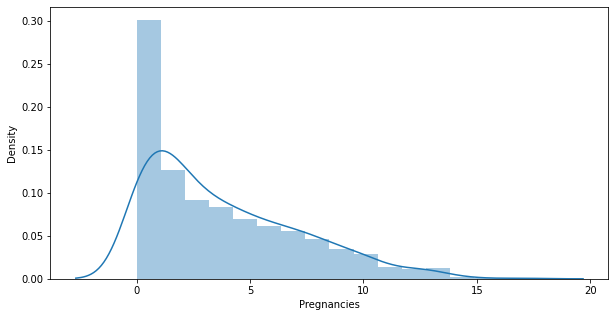

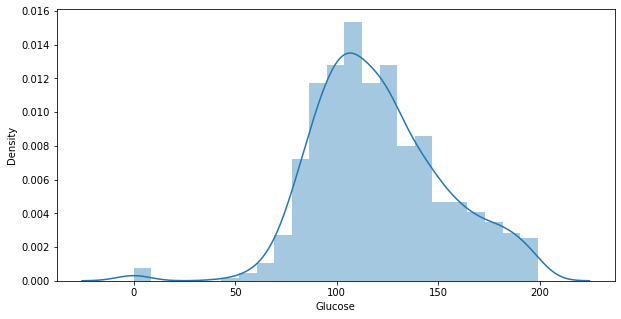

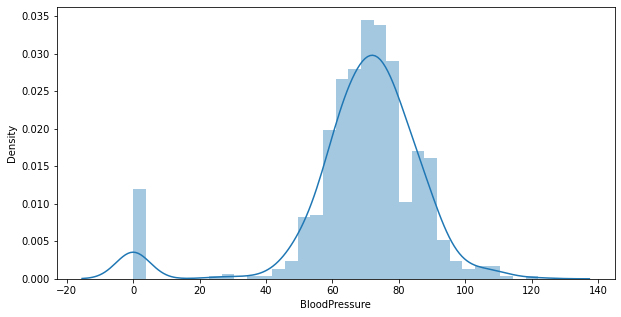

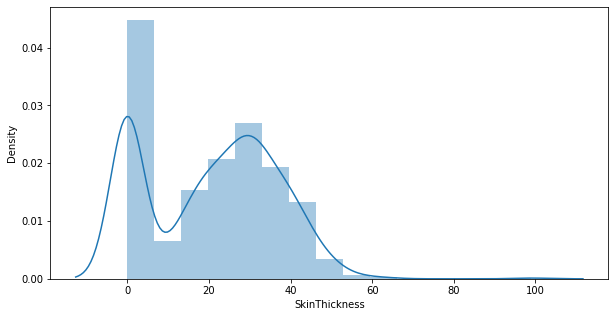

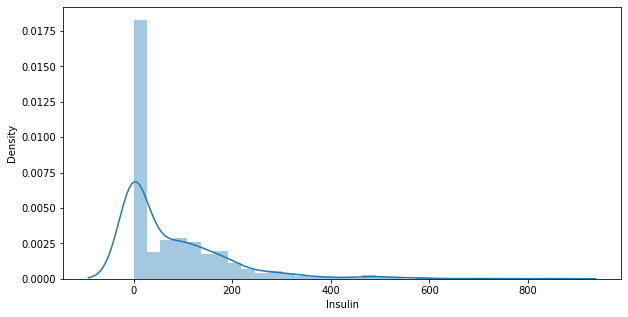

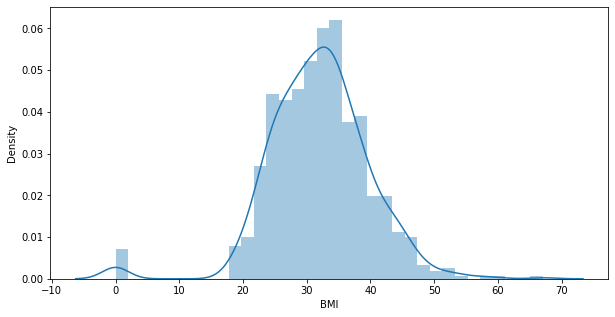

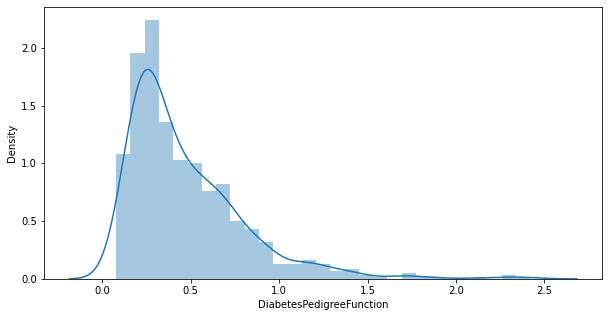

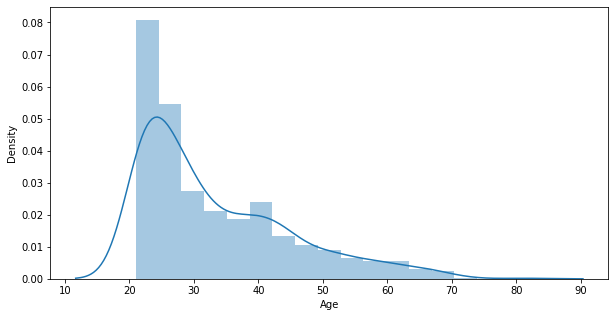

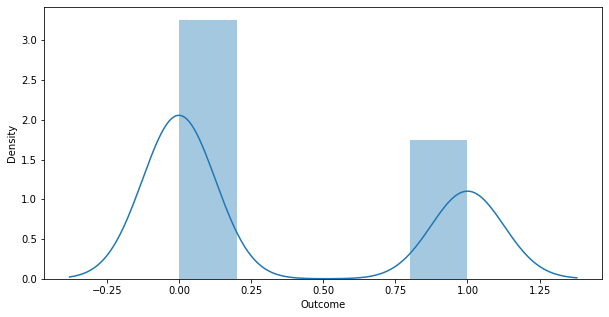

In [27]:
# Univariate analysis - data distribution of variables
plt.rcParams['figure.figsize'] = [10, 5]
for column in data.columns:
  plt.figure()
  sns.distplot(data[column])

Initail observations:
1. All are not null coulmns
2. Categorical features: Nominal & Ordinal: None.
3. Numerical continous features : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age
5. Numerical Discrete varaible (label) : Outcome
6. Glucose, BloodPressure, SkinThickness, Insulin & BMI are in direct relationship with Outcome

2.2 Data Cleaning:
 * missing value Treatment  

   i. Categorical features: Nominal & Ordinal  - Replace with Mode or most occuring value
   
   ii. Numirical Discrete features :  - Replace with Mode or most occuring value
   
   iii. Numirical continous features : Replace with Mean or Median

 * Outliers treatment - High = (Q3) + 1.5 IQR & Low = (Q1) – 1.5 IQR

 * Drop irrelevent data







***Visual Analysis:***
 * Univariate Analysis
 * Bivariate Analysis

    i. Categorical vs. Categorical

    ii. Categorical vs. continuous
    
    iii.Continuous vs. continuous
 * Multivariate Analysis

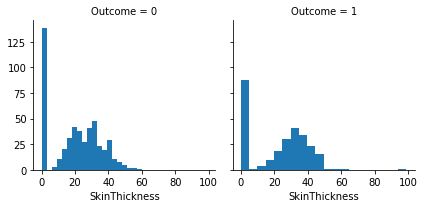

In [40]:
# Bivariate analysis - Categorical (Outcome) vs. continuous (Glucose)
graph = sns.FacetGrid(data, col='Outcome')
graph.map(plt.hist, 'SkinThickness', bins=20)

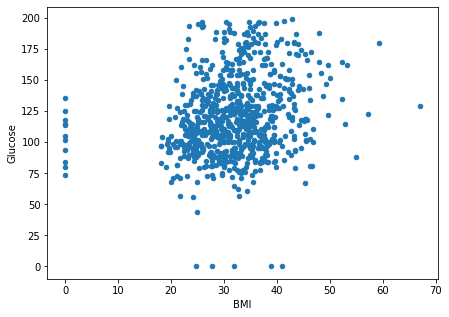

In [41]:
# Bivariate analysis - continuous (Glucose) vs. continuous (BMI)
data.plot.scatter(x='BMI', y='Glucose', marker='o', figsize=(7,5))

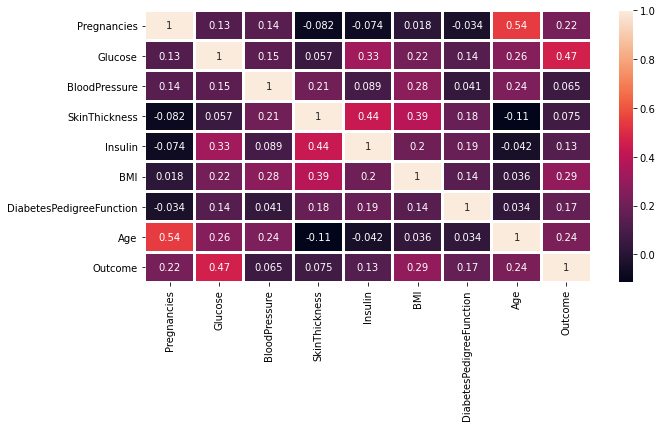

In [42]:
# Multivariate analysis
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=2)
plt.show()

2.3 Feature engineering:
 * Feature transformation - Convert categorical to Numerical use Encoding (LabelEncoder & OneHotEncoder) or discrete values such as 1 or 0
 * Feature creation - Create new feature from existing ones

*Resample* if the labels counts are not matching

In [45]:
# Separate majority and minority classes
df_majority = data[data.Outcome==0]
df_minority = data[data.Outcome==1]
print(df_majority.shape)
print(df_minority.shape)

(500, 9)
(268, 9)


In [46]:
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

*Data Normalization/Standardization*

In [47]:
# separating the data and labels
X = df_upsampled.drop(columns = 'Outcome', axis=1)
Y = df_upsampled['Outcome']

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
print(standardized_data)

[[-0.89463448 -1.23062714 -0.16981475 ... -0.78381024 -0.40960926
  -0.24717955]
 [-0.89463448 -1.10788968 -0.16981475 ... -0.58740595 -0.96274125
  -1.1255717 ]
 [ 0.25049766 -0.27941183  0.24436757 ... -0.91474643 -0.86053208
  -0.33501877]
 ...
 [-0.60835145 -0.61693984  0.55500432 ...  0.14583673  0.67260549
  -0.42285798]
 [-0.60835145  2.20602173  0.03727641 ...  0.27677292  0.2637688
   2.47583611]
 [-0.32206841  1.40822824  0.14082199 ...  0.09346225 -0.86654438
  -0.86205405]]


**3. Model Development**

3.1 Data partitioning

Splitting the dataset into the Training and Testing datasets

In [50]:
#Splitting the dataset into the Training and Testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, Y, test_size = 0.2, random_state = 2)

3.2 Model Selection

In [51]:
#training the support vector Machine Classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

3.3 Model Evaluation

* Accuracy Score*

In [52]:
# accuracy score on the test data
from sklearn.metrics import accuracy_score
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.725


# **Making a Predictive System**


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.25049766  1.25480642  0.14082199 -0.1437968   0.74169931 -0.88855919
   0.29984263  1.50960475]]
[1]
The person is diabetic
